In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
start = '2015-01-01'

In [3]:
overall = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [4]:
overall

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [5]:
stocks = overall.Symbol

In [6]:
stocks.head(5)

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object

In [7]:
stocks = stocks.to_list()

In [8]:
overall = overall[overall['Date added'] >= start]
# only those are relevant after the starting date of the analysis

In [9]:
overall

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
15,ALK,Alaska Air Group,Industrials,Passenger Airlines,"SeaTac, Washington",2016-05-13,766421,1985
16,ALB,Albemarle Corporation,Materials,Specialty Chemicals,"Charlotte, North Carolina",2016-07-01,915913,1994
...,...,...,...,...,...,...,...,...
478,WAB,Wabtec,Industrials,Construction Machinery & Heavy Transportation ...,"Pittsburgh, Pennsylvania",2019-02-27,943452,1999 (1869)
481,WBD,Warner Bros. Discovery,Communication Services,Broadcasting,"New York City, New York",2022-04-11,1437107,2022
487,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
493,WTW,Willis Towers Watson,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,2016


In [10]:
removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date','Removed']]

In [11]:
removed

Date Removed                          
                  Date  Ticker                  Security
0          May 4, 2023     FRC       First Republic Bank
1       March 20, 2023    LUMN        Lumen Technologies
2       March 15, 2023    SBNY            Signature Bank
3       March 15, 2023    SIVB       SVB Financial Group
4      January 5, 2023     VNO      Vornado Realty Trust
..                 ...     ...                       ...
319       June 9, 1999     HPH  Harnischfeger Industries
320  December 11, 1998     LDW                     Amoco
321  December 11, 1998     GRN                General Re
322  December 11, 1998     SUN                SunAmerica
323      June 17, 1997     USL                    USLife

[324 rows x 3 columns]

In [12]:
removed = removed.set_index(removed.Date.Date)
removed

Date Removed                          
                                Date  Ticker                  Security
Date                                                                  
May 4, 2023              May 4, 2023     FRC       First Republic Bank
March 20, 2023        March 20, 2023    LUMN        Lumen Technologies
March 15, 2023        March 15, 2023    SBNY            Signature Bank
March 15, 2023        March 15, 2023    SIVB       SVB Financial Group
January 5, 2023      January 5, 2023     VNO      Vornado Realty Trust
...                              ...     ...                       ...
June 9, 1999            June 9, 1999     HPH  Harnischfeger Industries
December 11, 1998  December 11, 1998     LDW                     Amoco
December 11, 1998  December 11, 1998     GRN                General Re
December 11, 1998  December 11, 1998     SUN                SunAmerica
June 17, 1997          June 17, 1997     USL                    USLife

[324 rows x 3 columns]

In [13]:
removed.index = pd.to_datetime(removed.index)
removed

Date Removed                          
                         Date  Ticker                  Security
Date                                                           
2023-05-04        May 4, 2023     FRC       First Republic Bank
2023-03-20     March 20, 2023    LUMN        Lumen Technologies
2023-03-15     March 15, 2023    SBNY            Signature Bank
2023-03-15     March 15, 2023    SIVB       SVB Financial Group
2023-01-05    January 5, 2023     VNO      Vornado Realty Trust
...                       ...     ...                       ...
1999-06-09       June 9, 1999     HPH  Harnischfeger Industries
1998-12-11  December 11, 1998     LDW                     Amoco
1998-12-11  December 11, 1998     GRN                General Re
1998-12-11  December 11, 1998     SUN                SunAmerica
1997-06-17      June 17, 1997     USL                    USLife

[324 rows x 3 columns]

In [14]:
removed = removed[removed.index >= start]
removed

Date Removed                      
                        Date  Ticker              Security
Date                                                      
2023-05-04       May 4, 2023     FRC   First Republic Bank
2023-03-20    March 20, 2023    LUMN    Lumen Technologies
2023-03-15    March 15, 2023    SBNY        Signature Bank
2023-03-15    March 15, 2023    SIVB   SVB Financial Group
2023-01-05   January 5, 2023     VNO  Vornado Realty Trust
...                      ...     ...                   ...
2015-03-23    March 23, 2015     AVP         Avon Products
2015-03-18    March 18, 2015     CFN            Carefusion
2015-03-12    March 12, 2015    PETM              PetSmart
2015-01-27  January 27, 2015     SWY               Safeway
2015-01-27  January 27, 2015     COV              Covidien

[196 rows x 3 columns]

In [15]:
removed = removed.Removed.dropna()
removed

,Ticker,Security
Date,,
2023-05-04,FRC,First Republic Bank
2023-03-20,LUMN,Lumen Technologies
2023-03-15,SBNY,Signature Bank
2023-03-15,SIVB,SVB Financial Group
2023-01-05,VNO,Vornado Realty Trust
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [16]:
stocks.extend(removed.Ticker.to_list())

In [17]:
df = yf.download(stocks, start=start)['Close']

[*********************100%***********************]  682 of 682 completed

79 Failed downloads:
- TWTR: No timezone found, symbol may be delisted
- YHOO: No data found for this date range, symbol may be delisted
- LO: No data found for this date range, symbol may be delisted
- RAI: No data found for this date range, symbol may be delisted
- QEP: No timezone found, symbol may be delisted
- BRCM: No data found for this date range, symbol may be delisted
- XL: No timezone found, symbol may be delisted
- SNDK: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- SWY: No data found for this date range, symbol may be delisted
- APC: No timezone found, symbol may be delisted
- LVLT: No data found for this date range, symbol may be delisted
- WFM: No data found for this date range, symbol may be delisted
- INFO: No timezone found, symbol may be delisted
- BCR: No data found for this date range, symbol may be delisted
- HCB

In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
removed[removed.Ticker == 'SBNY'].index[0]

Timestamp('2023-03-15 00:00:00')

In [20]:
df['SBNY']

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-05-16      0.122000
2023-05-17      0.137000
2023-05-18      0.146000
2023-05-19      0.139900
2023-05-22      0.124900
Name: SBNY, Length: 2111, dtype: float64

In [21]:
df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]
# filter for dates before the removal date

array([ True,  True,  True, ..., False, False, False])

In [22]:
df['SBNY'] = df['SBNY'][df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]]

In [23]:
df['SBNY']

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-05-16           NaN
2023-05-17           NaN
2023-05-18           NaN
2023-05-19           NaN
2023-05-22           NaN
Name: SBNY, Length: 2111, dtype: float64

In [24]:
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

In [25]:
def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= overall[overall.Symbol == ticker]['Date added'].values[0]]

In [26]:
for ticker_rem in removed.Ticker:
    pricefilter_rem(ticker_rem)

for ticker_add in overall.Symbol:
    pricefilter_add(ticker_add)

In [27]:
removed

,Ticker,Security
Date,,
2023-05-04,FRC,First Republic Bank
2023-03-20,LUMN,Lumen Technologies
2023-03-15,SBNY,Signature Bank
2023-03-15,SIVB,SVB Financial Group
2023-01-05,VNO,Vornado Realty Trust
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [28]:
df[['LUMN', 'SBNY']].tail(50)

,LUMN,SBNY
Date,,
2023-03-13,2.60,70.0
2023-03-14,2.60,70.0
2023-03-15,2.59,70.0
2023-03-16,2.49,NaN
2023-03-17,2.48,NaN
2023-03-20,2.49,NaN
2023-03-21,NaN,NaN
2023-03-22,NaN,NaN
2023-03-23,NaN,NaN


In [29]:
ret_df = df.pct_change()
ret_df

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018738,-0.057935,NaN,NaN,-0.028172,-0.018819,-0.008512,-0.006433,0.000223,NaN,...,-0.027362,-0.006932,-0.021818,-0.062237,NaN,-0.020318,0.037304,NaN,-0.037469,-0.006003
2015-01-06,-0.015578,0.007353,NaN,NaN,0.000094,-0.004950,0.005463,-0.025357,-0.011356,NaN,...,-0.005316,-0.012410,-0.013383,-0.005881,NaN,-0.012274,-0.008477,NaN,-0.038193,-0.009756
2015-01-07,0.013272,0.025879,NaN,NaN,0.014022,0.040417,0.019960,0.031829,0.008108,NaN,...,0.010133,0.025918,0.012811,0.007887,NaN,0.033138,0.024870,NaN,0.009546,0.020643
2015-01-08,0.029975,0.028461,NaN,NaN,0.038422,0.010459,0.002283,0.045064,0.020554,NaN,...,0.016645,0.024689,0.027530,0.007546,NaN,0.017420,0.010617,NaN,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,-0.013282,0.000000,-0.005602,-0.037802,0.000000,-0.022512,0.007269,0.000000,-0.004097,NaN,...,-0.024270,-0.012702,0.000000,-0.013188,NaN,0.007258,-0.014472,-0.015959,-0.023428,-0.013054
2023-05-17,0.011719,0.000000,0.050000,0.040566,0.003603,0.000419,0.001088,0.000000,-0.005211,NaN,...,0.022435,-0.006927,0.000000,0.006682,NaN,-0.011241,-0.003782,0.019859,0.101431,-0.013833
2023-05-18,0.010722,0.000000,0.009390,-0.005078,0.013666,0.000628,0.000172,0.000000,-0.003216,NaN,...,0.009063,0.008969,0.000000,0.004618,NaN,0.008964,0.005137,0.028196,0.040886,0.004359


In [30]:
mtl_ret = (ret_df + 1).resample('M').prod()
mtl_ret

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.931213,0.985516,1.000000,1.000000,1.071618,0.915920,1.050741,1.386760,0.996882,1.0,...,0.941721,0.963412,0.957818,0.895483,1.0,0.999032,0.995648,1.000000,0.846942,0.986608
2015-02-28,1.117554,0.945048,1.000000,1.000000,1.096449,1.002486,1.081115,1.174913,1.058311,1.0,...,1.012812,1.059564,1.036447,1.046921,1.0,1.122164,1.073952,1.000000,1.116027,1.078633
2015-03-31,0.984364,0.873563,0.970221,1.000000,0.968628,0.967603,1.106170,1.177496,0.978045,1.0,...,0.960018,0.960008,0.941392,0.980952,1.0,0.970534,0.976161,1.000000,1.009723,1.004339
2015-04-30,0.995668,1.038700,0.914930,1.000000,1.005786,1.104544,1.005542,0.883208,1.001943,1.0,...,1.027882,1.002162,0.894942,1.057110,1.0,1.091972,0.934649,1.000000,1.049630,0.959602
2015-05-31,0.995649,0.931446,0.877407,1.000000,1.040991,1.029848,0.984777,0.944638,1.046963,1.0,...,0.975163,1.020392,0.993044,0.987844,1.0,1.048278,1.038693,1.000000,1.019054,1.120441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,1.016238,1.000000,1.268868,1.035707,1.110521,0.914238,1.019613,1.000000,1.006922,1.0,...,1.051768,1.156721,1.000000,0.940671,1.0,1.018972,0.998745,1.233103,1.081367,1.129239
2023-02-28,0.933522,1.000000,0.990087,0.951931,1.021623,1.041624,0.920691,1.000000,0.920127,1.0,...,0.947418,1.033668,1.000000,0.986924,1.0,0.974332,0.972750,0.949617,0.952220,1.009124
2023-03-31,0.974431,1.000000,0.923029,0.838921,1.118649,1.035543,1.029249,1.000000,0.995478,1.0,...,0.997725,1.031784,1.000000,1.019971,1.0,1.038691,1.043029,1.059117,0.591268,0.996647


In [31]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()
mtl_12

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,1.030819,0.621536,0.778493,0.928673,0.962773,0.899074,1.146474,2.419726,1.000223,1.0,...,0.839707,1.171770,0.773091,0.958508,1.0,1.009675,0.911182,1.000000,0.965005,1.106442
2016-01-31,0.996823,0.465815,0.716728,0.938175,0.830830,0.909694,0.942241,1.649208,0.845621,1.0,...,0.890528,1.177094,0.740319,1.054252,1.0,1.001245,0.885459,1.000000,0.946578,1.007489
2016-02-29,0.884861,0.603786,0.753676,0.915901,0.752686,0.902645,0.842935,1.316170,0.817817,1.0,...,0.905241,1.149972,0.704029,1.047899,1.0,0.893478,0.804137,1.000000,0.797307,0.890866
2016-03-31,0.959085,0.741486,0.776999,0.989326,0.875914,0.975743,0.761415,1.324532,0.902871,1.0,...,0.983412,1.211043,0.868482,1.167904,1.0,1.039761,0.907335,1.000000,0.896667,0.957658
2016-04-30,0.989123,0.832340,0.718368,0.963164,0.749021,0.943396,0.744532,1.536539,0.838001,1.0,...,1.011789,1.168627,0.834783,1.128579,1.0,0.925547,1.053988,1.000000,0.971066,1.058757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,1.091588,1.000000,0.979964,0.657769,0.825552,1.079334,1.240529,1.287795,0.867331,1.0,...,1.527251,0.689442,1.000000,0.990383,1.0,1.042662,1.066170,0.621032,0.783840,0.828320
2023-02-28,1.089061,1.000000,0.926377,0.708920,0.892745,1.041483,1.091419,1.226170,0.843310,1.0,...,1.401556,0.703177,1.000000,1.154019,1.0,1.037363,1.003114,0.726400,0.714064,0.862381
2023-03-31,1.045417,1.000000,0.808219,0.587601,0.944390,0.983098,1.034904,1.150284,0.855526,1.0,...,1.327764,0.798050,1.000000,1.228008,1.0,1.114317,1.010164,0.768673,0.456528,0.882549


In [32]:
top_ = mtl_12.loc['2015-12-31'].nlargest(5)
top_

ABMD    2.419726
NFLX    2.294549
AMZN    2.190749
AYI     1.671433
NVDA    1.637357
Name: 2015-12-31 00:00:00, dtype: float64

In [33]:
top_.name

Timestamp('2015-12-31 00:00:00')

In [34]:
mtl_ret[top_.name:][1:2]

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.900502,0.738602,0.920661,1.010232,0.924758,0.926739,0.863562,0.945171,0.842797,1.0,...,0.998717,0.96779,0.917215,0.984932,1.0,0.990691,0.967541,1.0,0.830769,0.898372


In [35]:
relevant_ret = mtl_ret[top_.name:][1:2][top_.index]
relevant_ret

,ABMD,NFLX,AMZN,AYI,NVDA
Date,,,,,
2016-01-31,0.945171,0.802938,0.868485,0.865825,0.888653


In [36]:
relevant_ret.mean(axis=1)

Date
2016-01-31    0.874214
Freq: M, dtype: float64

In [37]:
def top_performers(date):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return (relevant_ret).mean(axis=1).values[0]

In [38]:
top_performers('2015-12-31')

0.874214231913179

In [39]:
returns = []
for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

In [40]:
pd.Series(returns).prod()

3.217597453172681

<Axes: xlabel='Date'>

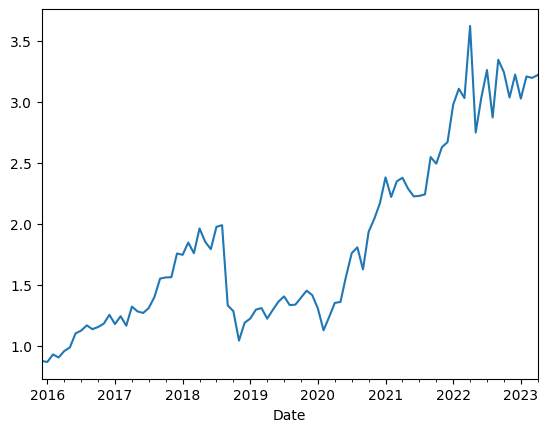

In [41]:
pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

In [42]:
s_p500 = yf.download('^GSPC', start=start).Close

[*********************100%***********************]  1 of 1 completed


In [43]:
s_p500

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2023-05-16    4109.899902
2023-05-17    4158.770020
2023-05-18    4198.049805
2023-05-19    4191.979980
2023-05-22    4192.629883
Name: Close, Length: 2111, dtype: float64

In [44]:
4192.629883/2058.199951

2.0370372086361006